In [4]:
from __future__ import print_function

import os
import glob
import rosbag
import pandas as pd
import numpy as np
import cv2
import time 

import ipywidgets as widgets
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

from os import path
from utils.visualisation import *
from utils.postprocessing.utils import csvs2dfs
from functools import reduce
from ipywidgets import interact, interactive, fixed, interact_manual
from utils.visualisation import *
from utils.postprocessing.utils import *
from matplotlib import gridspec
from env.spawn.SpawnStragety import FlatGroundSpawnStrategy

In [5]:
from utils.visualisation import VisualiseSimulation

In [6]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
%%html
<style>

div.output_scroll {
    height : auto;
}
</style>

# Visualize the simulation
Visualize the robot's simulation on a specific map is tremendously useful to understand if everything went perfect. Also, we can have an idea about the generated dataset.

In [8]:
def folder2maps(folder):
    maps = glob.glob('/home/francesco/Documents/Master-Thesis/core/maps/{}/*.png'.format(folder))
    return maps, list(map(lambda x : path.splitext(path.basename(x))[0], maps))


def map2dfs(hm_path, csv_path):
    hm = cv2.imread(hm_path)
    hm = cv2.cvtColor(hm, cv2.COLOR_BGR2GRAY)
    
    csvs_dir = csv_path
    print(csvs_dir)
    csvs_paths = glob.glob(csvs_dir)
    
    csvs_paths.sort()
    
    dfs = csvs2dfs(csvs_paths)
    print(len(dfs))
    return csvs_paths, dfs, hm

In [15]:
FOLDER = '92'
MODE = 'train'
MAP_NAME = 'bars1'

In [16]:
csvs_paths, dfs, hm  = map2dfs('/home/francesco/Documents/Master-Thesis/core/maps/{}/{}.png'.format(MODE, MAP_NAME)
                               , '/home/francesco/Desktop/bars1-run-recorded/csvs-light/{}/*.csv'.format(MAP_NAME)
                              )

/home/francesco/Desktop/bars1-run-recorded/csvs-light/bars1/*.csv
1


In [22]:
deb_pip.show_labeled_patches(dfs[0])

<IPython.core.display.Javascript object>

KeyError: "None of [Int64Index([0, 1, 2, 3], dtype='int64')] are in the [index]"

<IPython.core.display.Javascript object>


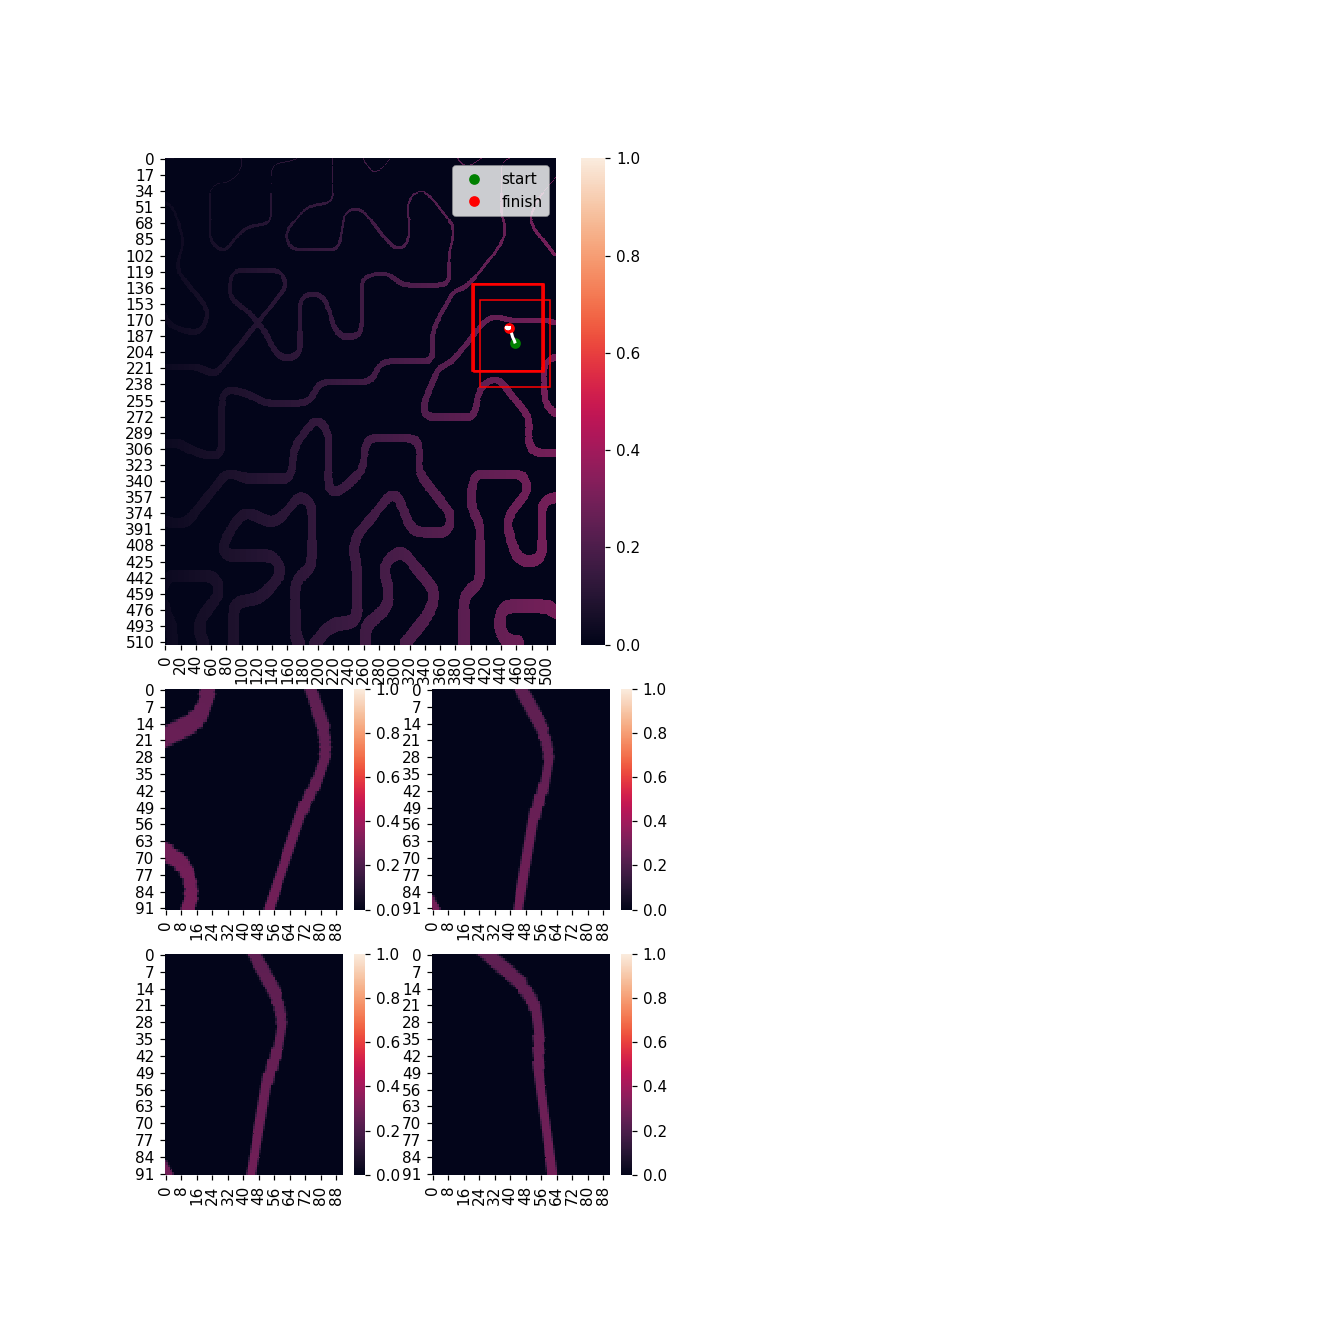

[0, 1, 2, 3, 4]


<IPython.core.display.Javascript object>


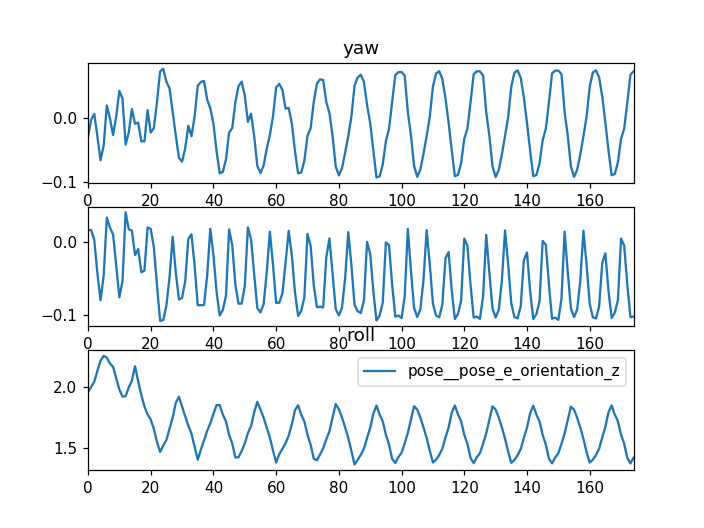

<IPython.core.display.Javascript object>


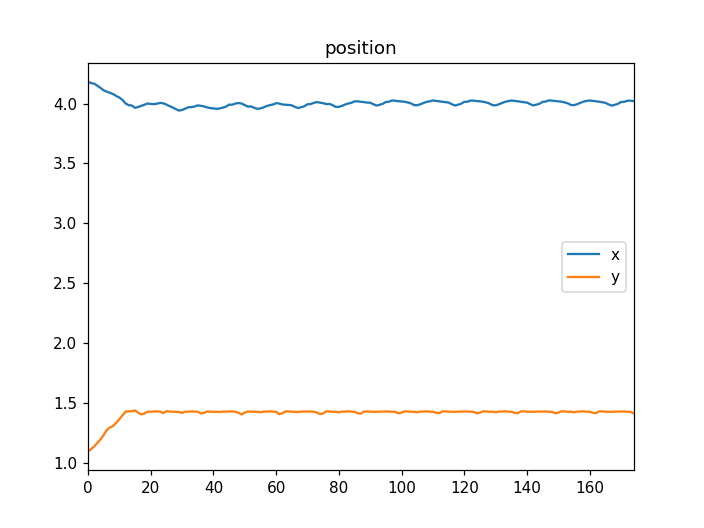

<IPython.core.display.Javascript object>


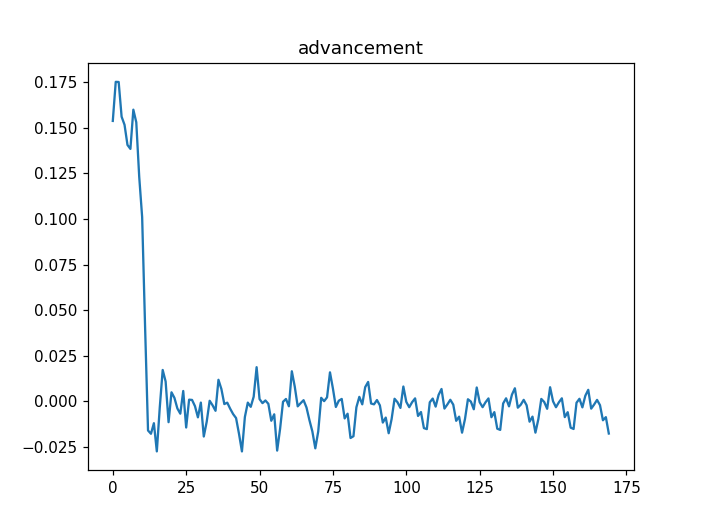

<IPython.core.display.Javascript object>


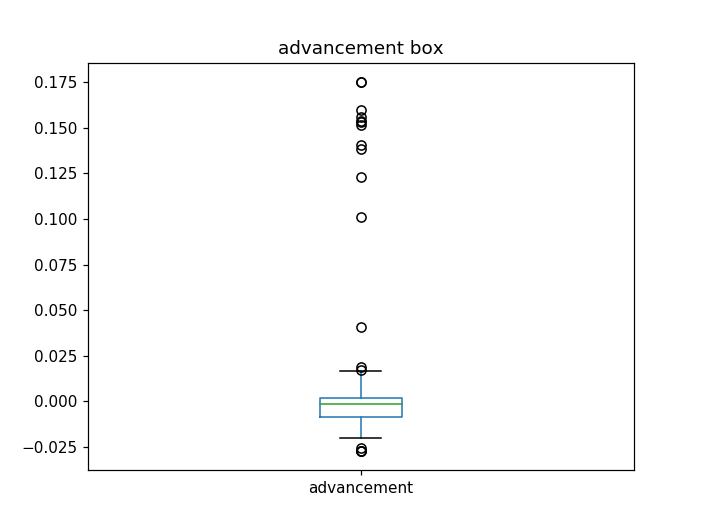

In [13]:
deb_pip = VisualiseSimulation(hm, patch_size=92)

deb_pip(dfs[0])

<IPython.core.display.Javascript object>


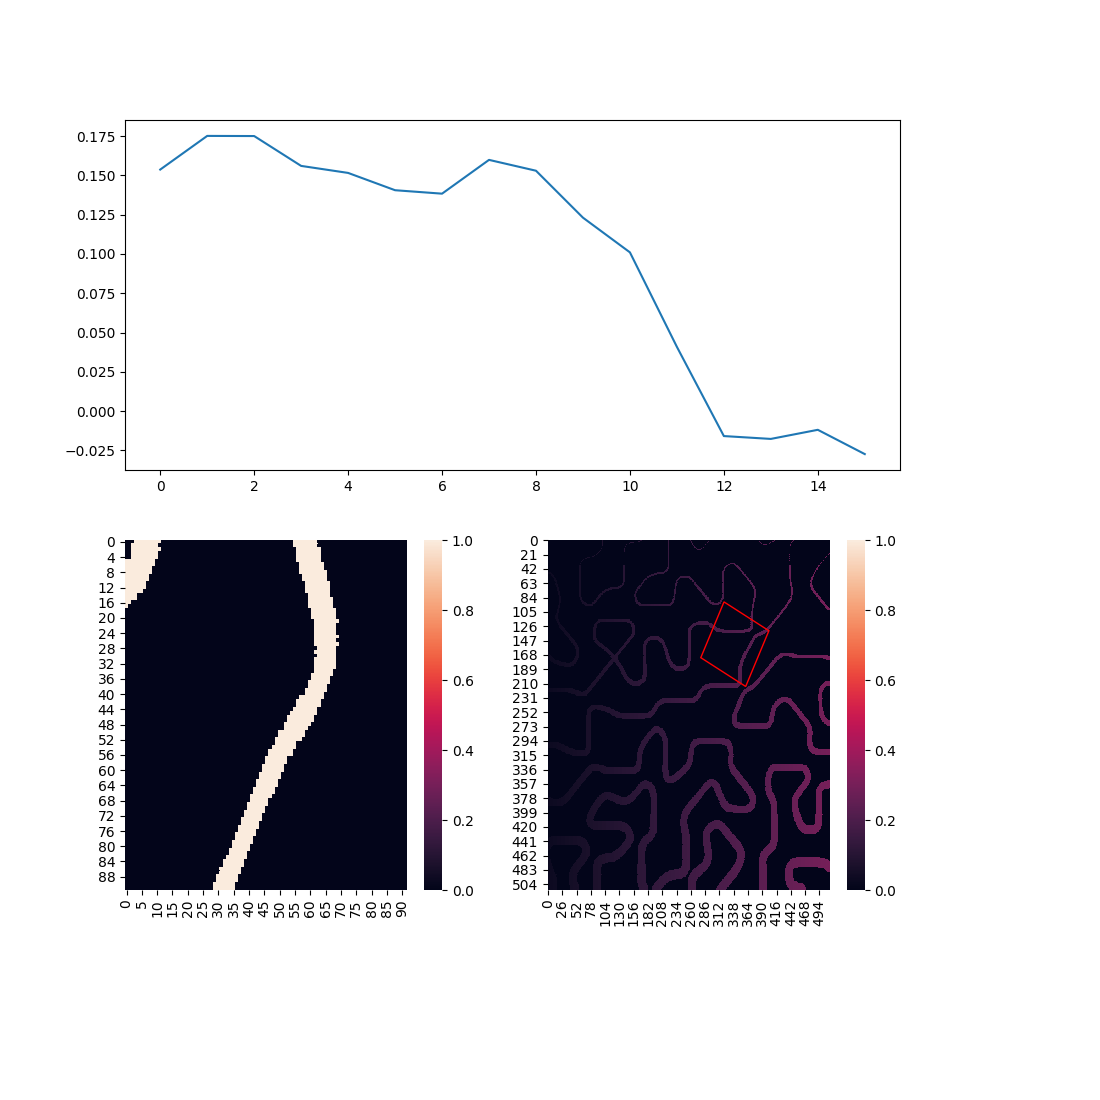

112.16631058551839
114.66759294737852
117.18001877276099
122.34515459030021
127.03385176174287
129.366996225553
128.4622094625653
125.72597812276487
124.15139274800308
118.83460182458593
113.4531750071688
110.11298159844526
110.34939579084654
114.38497743689148
117.69616934387122
124.44017423083105
117.34269223421634


KeyboardInterrupt: 

In [22]:
deb_pip.plot_patch_map_advancement_in_time(dfs[0])


In [9]:
FOLDER = '92'
MODE = 'test'
MAP_NAME = 'querry-big-10'

In [10]:
csvs_paths, dfs, hm  = map2dfs('/home/francesco/Documents/Master-Thesis/core/maps/{}/{}.png'.format(MODE, MAP_NAME)
                               , '/home/francesco/Desktop/data/test/bags/querry-big-10/'.format(FOLDER, MODE, MAP_NAME)
                              )


/home/francesco/Desktop/carino/vaevictis/krock-dataset/92/test/csvs-light/querry-big-10/*.csv
50


<IPython.core.display.Javascript object>


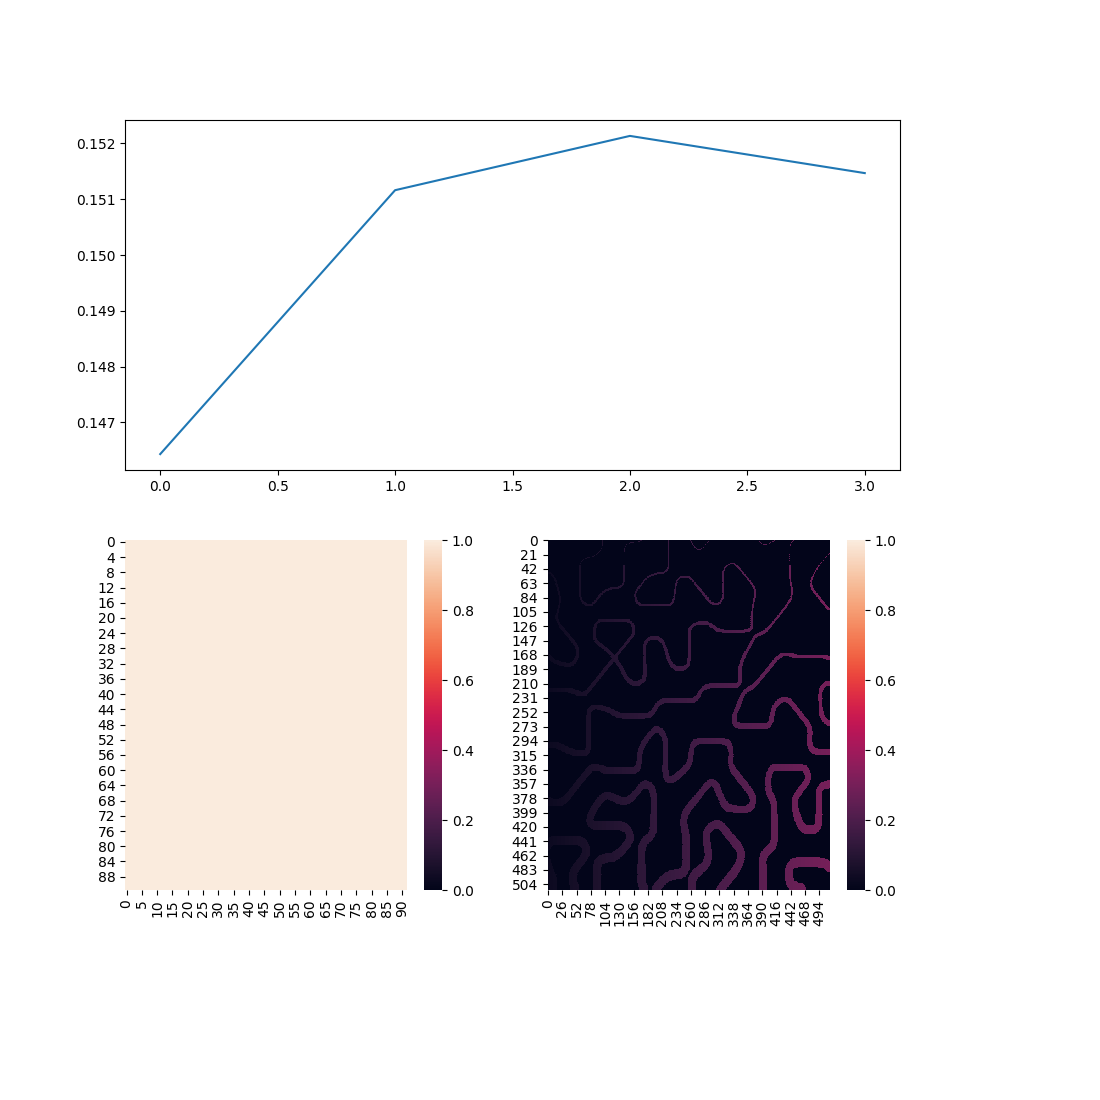

KeyboardInterrupt: 

In [12]:
deb_pip.plot_patch_map_advancement_in_time(dfs[0])


## Plotting statistics

In [32]:
def plot_stats(df):
    fig = plt.figure()
    df['advancement'].plot.line()

    fig = plt.figure()
    df['advancement'].plot.box()
    print('mean={}'.format(df['advancement'].mean()))
    

In [33]:
def concat_dfs(dfs):
    df_total = pd.concat(filter(lambda x: len(x) > 0, dfs))
    df_total = df_total.dropna()
    df_total = df_total.reset_index(drop=True) # we need to reset the index otherwise the plots are based on the old overlapping indexes
    
    return df_total

In [ ]:
df = concat_dfs(dfs)

### Classes Balance

In [ ]:
trs = np.arange(0.04,0.15,0.01)

def plot_classes_distribution(tr, remove_negative):
    temp = df.copy()
    if remove_negative: temp = temp[temp.loc[:,'advancement'] >= 0]
    temp['label'] = temp['advancement'] > tr
    temp['label'].value_counts().plot.bar()
    
    
interact(plot_classes_distribution, tr=trs, remove_negative=False)


The following pictures shows the advancement in time after stacking all the dataframe one after the others, and the box plot.

### Average statistics for all the dataframes

In [ ]:
plot_stats(df)

### Remove negative advancement
By removing negative advancement we have a cleaner distribution of the data points

In [ ]:
plot_stats(df[df["advancement"] >= 0])

### Robot traces 

In [ ]:
deb_pip = VisualiseSimulation(hm, patch_size=92)
deb_pip.show_traces(dfs)

### Robot patches and robot's position and angle for a given map

In [ ]:
%%html
<style>

div.output_scroll {
    height : auto !important;
}
</style>

In [ ]:
def csv_path2debug(csv_path, remove_negative):
    idx = csvs_paths.index(csv_path)
    print(csv_path, idx)
    temp = dfs[idx].copy()
    if remove_negative: temp = temp[temp.loc[:,'advancement'] >= 0]
    deb_pip(temp)
    

interact(csv_path2debug, csv_path=csvs_paths, remove_negative=False)

number 10 robot is stuck

In [ ]:
deb_pip.plot_patch_map_advancement_in_time(dfs[28])


In [ ]:
spawn_strat = FlatGroundSpawnStrategy(hm_path=hm, debug=True)

_ = spawn_strat(100)

## Robot in flat ground

In [30]:
_, dfs_flat, hm_flat  = map2dfs('/home/francesco/Documents/Master-Thesis/core/maps/test/flat.png'
                               , '/home/francesco/Desktop/carino/vaevictis/krock-dataset/flat/csvs/flat/*.csv'
                              )

/home/francesco/Desktop/carino/vaevictis/krock-dataset/flat/csvs/flat/*.csv
10


In [ ]:
# _, dfs_flat, hm_flat  = map2dfs('/home/francesco/Documents/Master-Thesis/core/maps/test/flat.png'
#                                , '/home/francesco/Desktop/carino/vaevictis/data/train_no_tail/val/csvs/flat/*.csv'
#                               )

<IPython.core.display.Javascript object>


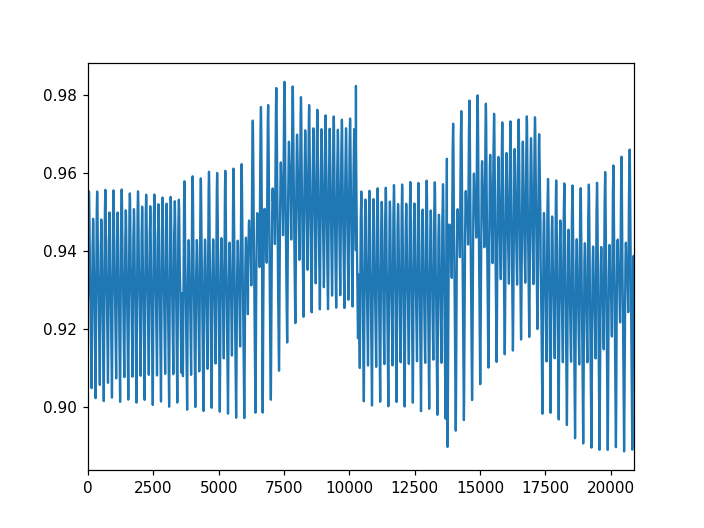

<IPython.core.display.Javascript object>


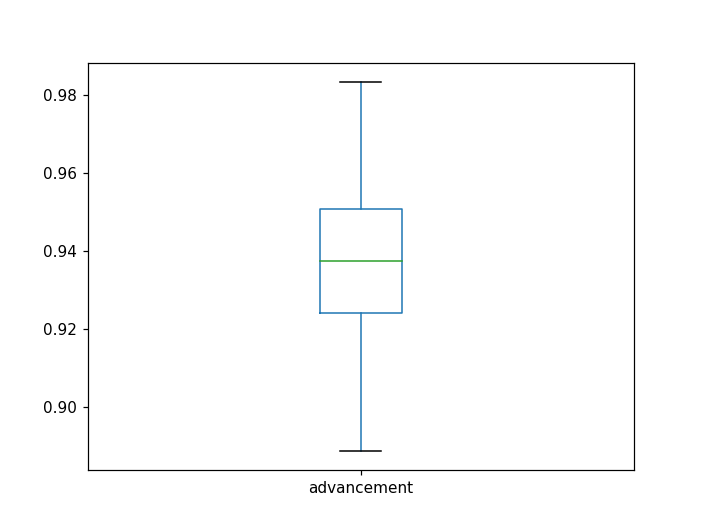

mean=0.9371638870467511


In [34]:
plot_stats(concat_dfs(dfs_flat))